# EDA 

In [1]:
import pandas as pd
import numpy as np
import json 
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
path_games_csv = (r'D:\Users\Arnaldo\Desktop\SISTEMAS\SOYHENRY\CURSO\PROYECTOS\PROYECTO INDIVIDUAL I\RECURSADO\ARCHIVOS\DATAFRAMES\df_games.csv')
df_games = pd.read_csv(path_games_csv)
path_items_csv = (r'D:\Users\Arnaldo\Desktop\SISTEMAS\SOYHENRY\CURSO\PROYECTOS\PROYECTO INDIVIDUAL I\RECURSADO\ARCHIVOS\DATAFRAMES\df_items.csv')
df_items = pd.read_csv(path_items_csv)
path_reviews_csv = (r'D:\Users\Arnaldo\Desktop\SISTEMAS\SOYHENRY\CURSO\PROYECTOS\PROYECTO INDIVIDUAL I\RECURSADO\ARCHIVOS\DATAFRAMES\df_reviews.csv')
df_reviews = pd.read_csv(path_reviews_csv)


In [3]:
df_games


,genres,app_name,release_date,price,item_id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,[,],year
0,"Action, Casual, Indie, Simulation, Strategy",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,0,1,0,0,...,1,0,0,1,0,0,0,0,0,2018
1,"Free to Play, Indie, RPG, Strategy",Ironbound,2018-01-04,0.00,643980.0,Secret Level SRL,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018
2,"Casual, Free to Play, Indie, Simulation, Sports",Real Pool 3D - Poolians,2017-07-24,0.00,670290.0,Poolians.com,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2017
3,"Action, Adventure, Casual",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2017
4,"[, ]",Log Challenge,NaN,2.99,773570.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30744,"Casual, Indie, Simulation, Strategy",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS""",0,0,0,0,...,1,0,0,1,0,0,0,0,0,2018
30745,"Casual, Indie, Strategy",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018
30746,"Indie, Racing, Simulation",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2018
30747,"Casual, Indie",EXIT 2 - Directions,2017-09-02,4.99,658870.0,"xropi,stev3ns",0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017


In [4]:
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30749 entries, 0 to 30748
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   genres                     30749 non-null  object 
 1   app_name                   30748 non-null  object 
 2   release_date               28773 non-null  object 
 3   price                      30749 non-null  float64
 4   item_id                    30747 non-null  float64
 5   developer                  27592 non-null  object 
 6   Accounting                 30749 non-null  int64  
 7   Action                     30749 non-null  int64  
 8   Adventure                  30749 non-null  int64  
 9   Animation &amp; Modeling   30749 non-null  int64  
 10  Audio Production           30749 non-null  int64  
 11  Casual                     30749 non-null  int64  
 12  Design &amp; Illustration  30749 non-null  int64  
 13  Early Access               30749 non-null  int

In [5]:
df_games.describe()

,price,item_id,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,[,],year
count,30749.000000,3.074700e+04,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,...,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000,30749.000000
mean,8.901906,4.522103e+05,0.000228,0.348597,0.254317,0.005594,0.002797,0.262350,0.014667,0.045107,...,0.211877,0.003317,0.039318,0.218121,0.010472,0.003447,0.008488,0.101987,0.101987,1885.294514
std,16.388727,1.834344e+05,0.015087,0.476534,0.435484,0.074583,0.052812,0.439919,0.120219,0.207543,...,0.408645,0.057500,0.194354,0.412977,0.101797,0.058613,0.091740,0.302636,0.302636,494.080280
min,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.990000,3.288400e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
50%,4.990000,4.547000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,9.990000,5.943050e+05,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
max,995.000000,2.028850e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000


CALCULO PORCENTAJE DE NULOS

Total de valores nulos: 5136
Total de valores: 953219
Porcentaje de valores nulos: 0.54%


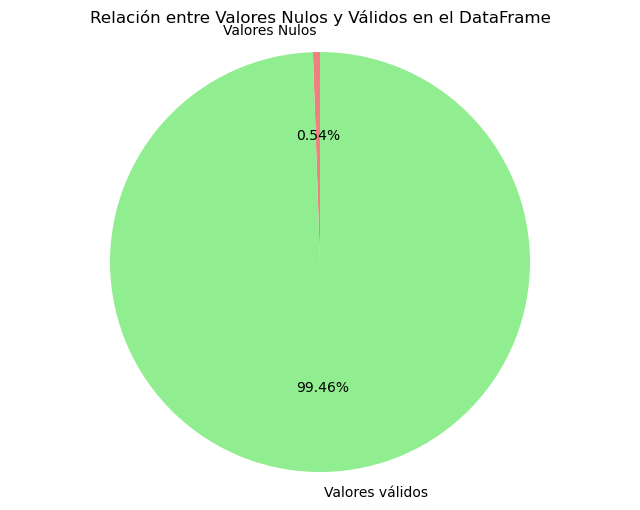

In [6]:
# Número total de valores nulos en el DataFrame
total_nulos = df_games.isnull().sum().sum()

# Número total de valores en el DataFrame
total_valores = df_games.size

# Porcentaje de valores nulos
porcentaje_nulos = (total_nulos / total_valores) * 100

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de valores: {total_valores}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

# Crear una lista de valores para el gráfico de torta
valores = [total_nulos, total_valores - total_nulos]
etiquetas = ['Valores Nulos', 'Valores válidos']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.2f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Relación entre Valores Nulos y Válidos en el DataFrame')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



BUSCO OUTLIERS

In [7]:
dfgames_outliers = df_games.copy()

ANALIZO EL CAMPO 'GENRES'

In [8]:
# Supongamos que 'df' es tu DataFrame

# Filtrar solo los valores de tipo string en la columna 'genres'
valores_string = dfgames_outliers.loc[dfgames_outliers['genres'].apply(lambda x: isinstance(x, str)), 'genres']

# Encontrar los valores únicos
valores_unicos_string = valores_string.unique()

# Mostrar los valores único

valores_unicos_string

array(['Action, Casual, Indie, Simulation, Strategy',
       'Free to Play, Indie, RPG, Strategy',
       'Casual, Free to Play, Indie, Simulation, Sports',
       'Action, Adventure, Casual', '[, ]',
       'Action, Adventure, Simulation',
       'Free to Play, Indie, Simulation, Sports',
       'Action, Adventure, Casual, Indie, RPG', 'Casual, Indie',
       'Casual, Indie, Simulation',
       'Adventure, Casual, Indie, Simulation, Strategy',
       'Action, Adventure, Indie', 'Racing, Simulation, Sports',
       'Action, Indie', 'Action, Indie, Racing', 'Action',
       'Action, Indie, RPG', 'Action, Adventure, RPG',
       'Adventure, Casual, Indie, RPG', 'Strategy',
       'Action, Indie, Strategy, Early Access',
       'Action, Adventure, Indie, RPG', 'Casual, Strategy, Early Access',
       'Adventure, Casual, Free to Play, Indie', 'Indie, Strategy',
       'Indie, Simulation', 'Racing', 'Adventure, RPG',
       'Action, Adventure', 'RPG', 'Action, RPG', 'Casual',
       'RPG, C

In [9]:
# Reemplazar el valor '[, ]' por NaN en la columna 'genres'
dfgames_outliers['genres'] = dfgames_outliers['genres'].replace('[, ]', pd.NA)

# Eliminar las filas donde 'genres' es NaN
dfgames_outliers = dfgames_outliers.dropna(subset=['genres'])

# Mostrar el DataFrame actualizado
print(dfgames_outliers['genres'])


0            Action, Casual, Indie, Simulation, Strategy
1                     Free to Play, Indie, RPG, Strategy
2        Casual, Free to Play, Indie, Simulation, Sports
3                              Action, Adventure, Casual
5                          Action, Adventure, Simulation
                              ...                       
30743                   Action, Adventure, Casual, Indie
30744                Casual, Indie, Simulation, Strategy
30745                            Casual, Indie, Strategy
30746                          Indie, Racing, Simulation
30747                                      Casual, Indie
Name: genres, Length: 27613, dtype: object


In [10]:
# Obtener los valores únicos en la columna 'genres'
valores_unicos = dfgames_outliers['genres'].unique()

# Mostrar los tipos de datos presentes en 'genres'
print("Tipos de datos en 'genres':", [type(valor) for valor in valores_unicos])


Tipos de datos en 'genres': [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str

In [11]:
# Obtengo los tipos de datos en la columna 'genres'
tipos_de_datos = dfgames_outliers['genres'].apply(type).unique()

# Muestro la lista de tipos de datos presentes
print("Tipos de datos en 'genres':", tipos_de_datos)

# Busco si hay valores que no sean tipo string
no_strings = [valor for valor in dfgames_outliers['genres'] if not isinstance(valor, str)]

# Muestro los valores que no son tipo string
if no_strings:
    print("Valores que no son tipo string en 'genres':", no_strings)
else:
    print("No se encontraron valores que no sean tipo string en 'genres'.")


Tipos de datos en 'genres': [<class 'str'>]
No se encontraron valores que no sean tipo string en 'genres'.


ANALIZO EL CAMPO 'RELEASE DATE'

In [12]:
# Filtro solo los valores de tipo string en la columna 'release_date'
valores_string = dfgames_outliers.loc[dfgames_outliers['release_date'].apply(lambda x: isinstance(x, str)), 'release_date']

# Encuento los valores únicos
valores_unicos_string = valores_string.unique()

# Muestro los valores único

valores_unicos_string

array(['2018-01-04', '2017-07-24', '2017-12-07', ..., '2003-11-01',
       '2004-03-16', '2004-03-01'], dtype=object)

In [13]:
# Convierto la columna 'release_date' a objetos de fecha y hora
dfgames_outliers['release_date'] = pd.to_datetime(dfgames_outliers['release_date'])

# Verifico el tipo de datos después de la conversión
print(dfgames_outliers['release_date'].dtype)


datetime64[ns]


In [14]:
# Obtengo los tipos de datos en la columna 'release_date'
tipos_de_datos = dfgames_outliers['release_date'].apply(type).unique()

# Muestro la lista de tipos de datos presentes
print("Tipos de datos en 'release_date':", tipos_de_datos)

# Busco si hay valores que no sean tipo datetime
no_datetime = [valor for valor in dfgames_outliers['release_date'] if not isinstance(valor, pd.Timestamp)]

# Muestro los valores que no son tipo datetime
if no_datetime:
    print("Valores que no son tipo datetime en 'release_date':", no_datetime)
else:
    print("No se encontraron valores que no sean tipo datetime en 'release_date'.")


Tipos de datos en 'release_date': [<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]
Valores que no son tipo datetime en 'release_date': [NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT]


In [41]:
# Elimino los registros que contienen NaT en la columna 'release_date'
dfgames_outliers = dfgames_outliers.dropna(subset=['release_date'])

ANALIZO EL CAMPO 'PRICE'

In [18]:
# Filtro solo los valores de tipo string en la columna 'price'
valores_string_price = dfgames_outliers.loc[dfgames_outliers['price'].apply(lambda x: isinstance(x, str)), 'price']

# Encuentro los valores únicos
valores_unicos_string_price = valores_string_price.unique()

# Muestro los valores únicos
valores_unicos_string_price


array([], dtype=float64)

Total de valores nulos en 'price': 0
Total de valores en 'price': 27570
Porcentaje de valores nulos en 'price': 0.00%


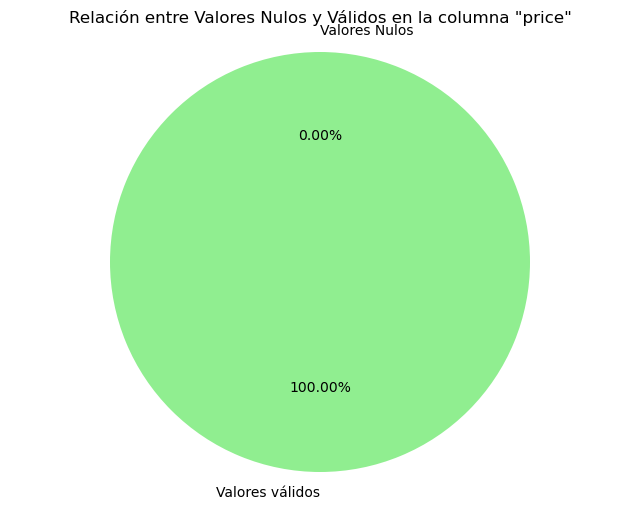

In [19]:
# Número total de valores nulos en la columna 'price'
total_nulos_price = dfgames_outliers['price'].isnull().sum()

# Número total de valores en la columna 'price'
total_valores_price = dfgames_outliers['price'].size

# Porcentaje de valores nulos en la columna 'price'
porcentaje_nulos_price = (total_nulos_price / total_valores_price) * 100

print(f"Total de valores nulos en 'price': {total_nulos_price}")
print(f"Total de valores en 'price': {total_valores_price}")
print(f"Porcentaje de valores nulos en 'price': {porcentaje_nulos_price:.2f}%")

# Creo una lista de valores para el gráfico de torta
valores_price = [total_nulos_price, total_valores_price - total_nulos_price]
etiquetas_price = ['Valores Nulos', 'Valores válidos']

# Creo el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores_price, labels=etiquetas_price, autopct='%1.2f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Relación entre Valores Nulos y Válidos en la columna "price"')
plt.axis('equal') 
plt.show()


In [21]:
# Elimino registros con valores nulos en la columna 'price'
dfgames_cleaned = dfgames_outliers.dropna(subset=['price'])

# Elimino registros que contienen valores de tipo string en la columna 'price'
dfgames_cleaned = dfgames_cleaned[~dfgames_cleaned['price'].apply(lambda x: isinstance(x, str))]




In [22]:
# Verifico si el campo 'price' es del tipo float
is_float = dfgames_cleaned['price'].apply(lambda x: isinstance(x, float))

# Filtro los registros que no son del tipo float
not_float_records = dfgames_cleaned[~is_float]

if not_float_records.empty:
    print("Todos los registros en 'price' son del tipo float.")
else:
    print("Registros en 'price' que no son del tipo float:")
    print(not_float_records)



Todos los registros en 'price' son del tipo float.


In [23]:
print("Valores en el campo 'price':")
for value in dfgames_outliers['price']:
    print(value)

Valores en el campo 'price':
4.99
0.0
0.0
0.99
3.99
9.99
18.99
29.99
10.99
3.99
2.99
1.59
14.99
1.99
59.99
0.99
2.99
2.99
4.99
9.99
9.99
1.99
0.99
8.99
0.99
6.99
6.99
9.99
7.99
10.99
9.99
9.99
1.99
0.99
9.99
9.99
9.99
9.99
39.99
0.0
4.99
4.99
4.99
19.99
9.99
7.49
14.99
9.99
4.99
9.99
4.99
9.99
9.99
4.99
4.99
4.99
8.99
19.99
19.99
4.99
19.99
4.99
14.99
4.99
4.99
4.99
2.99
2.99
9.99
2.99
4.99
4.99
12.99
19.99
12.99
12.99
9.99
4.99
6.99
9.99
9.99
9.99
6.99
9.99
19.99
9.99
9.99
9.99
9.99
9.99
5.99
7.99
9.99
9.99
4.99
2.99
19.99
2.99
14.99
9.99
4.99
9.99
9.99
9.99
9.99
9.99
9.99
4.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
9.99
4.99
7.99
4.99
19.99
2.99
2.99
7.99
4.99
4.99
4.99
9.99
19.99
19.99
4.99
9.99
9.99
2.99
2.49
19.99
9.99
19.99
9.99
9.99
9.99
4.99
4.99
9.99
9.99
9.99
19.99
9.99
9.99
4.99
9.99
15.99
0.0
4.99
19.99
14.99
9.99
4.99
4.99
4.99
4.99
4.99
4.99
4.99
4.99
9.99
19.99
9.99
19.99
9.99
14.99
7.99
9.99
4.99
9.99
5.99
2.99
4.9

In [24]:
# Filtro solo los valores de tipo string en la columna 'price'
valores_string_price = dfgames_outliers.loc[dfgames_outliers['price'].apply(lambda x: isinstance(x, str)), 'price']

# Encuentro los valores únicos
valores_unicos_string_price = valores_string_price.unique()

# Muestro los valores únicos
valores_unicos_string_price

array([], dtype=float64)

CALCULO Y BUSCO OUTLIERS

In [25]:
# Cargo el DataFrame dfgames_outliers.

# Outliers en 'release_date'
def find_invalid_dates(df, date_column):
    invalid_dates = df[~pd.to_datetime(df[date_column], errors='coerce').notnull()]
    return invalid_dates

# Outliers en 'price' y 'item_id'
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Datos categóricos: 'app_name' y 'developer'
# Aquí solo vamos a mostrar valores únicos y sus frecuencias para identificar posibles inconsistencias
def unique_values_info(df, column):
    return df[column].value_counts()

# Verifico fechas inválidas
invalid_release_dates = find_invalid_dates(dfgames_outliers, 'release_date')
if invalid_release_dates.empty:
    print("No se encontraron fechas inválidas en 'release_date'.")
else:
    print("Fechas inválidas en 'release_date':")
    print(invalid_release_dates)

# Busco outliers en 'price'
outliers_price = find_outliers(dfgames_outliers, 'price')
if outliers_price.empty:
    print("No se encontraron outliers en 'price'.")
else:
    print("Outliers en 'price':")
    print(outliers_price)

# Busco outliers en 'item_id'
outliers_item_id = find_outliers(dfgames_outliers, 'item_id')
if outliers_item_id.empty:
    print("No se encontraron outliers en 'item_id'.")
else:
    print("Outliers en 'item_id':")
    print(outliers_item_id)

# Valores únicos en 'app_name'
unique_app_names = unique_values_info(dfgames_outliers, 'app_name')
print("Valores únicos en 'app_name':")
print(unique_app_names)

# Valores únicos en 'developer'
unique_developers = unique_values_info(dfgames_outliers, 'developer')
print("Valores únicos en 'developer':")
print(unique_developers)
    

No se encontraron fechas inválidas en 'release_date'.
Outliers en 'price':
                                                  genres  \
8                Free to Play, Indie, Simulation, Sports   
16               Free to Play, Indie, Simulation, Sports   
46                                                Racing   
215                           Massively Multiplayer, RPG   
291                                           Simulation   
...                                                  ...   
30583  Animation &amp; Modeling, Design &amp; Illustr...   
30594                                    RPG, Simulation   
30607  Massively Multiplayer, Racing, Simulation, Sports   
30699  Action, Adventure, Casual, Indie, Simulation, ...   
30717                        Utilities, Video Production   

                                              app_name release_date  price  \
8                        SNOW - All Access Legend Pass   2018-01-04  29.99   
16                                SNOW - Lifetim

NUBE DE PALABRAS

Creo un dataframe para hacer la nube de palabras y poder alterar la columna a genres sin generar problemas en análisis futuros en el df orginal.

In [26]:
dfgames_nube = df_games.copy()

In [27]:
texto = ' '.join(dfgames_nube['genres'])

In [28]:
texto = texto.lower()

def caracteres_especiales(texto):
    return re.sub(r'[^a-zA-Z0-9\s]', '', texto)
texto = caracteres_especiales(texto)
texto

'action casual indie simulation strategy free to play indie rpg strategy casual free to play indie simulation sports action adventure casual   action adventure simulation free to play indie simulation sports free to play indie simulation sports free to play indie simulation sports   action adventure casual indie rpg casual indie casual indie simulation adventure casual indie simulation strategy free to play indie simulation sports adventure casual indie simulation strategy free to play indie simulation sports     action adventure indie   racing simulation sports racing simulation sports action indie   action indie racing action action indie rpg   casual indie simulation action adventure rpg adventure casual indie rpg strategy strategy action indie rpg action indie strategy early access action adventure indie rpg casual strategy early access action indie   action adventure casual adventure casual free to play indie action indie strategy action indie rpg indie simulation racing casual in

#### Creación de la nube de palabras para poder analizar los generos más repetidos.

(-0.5, 999.5, 699.5, -0.5)

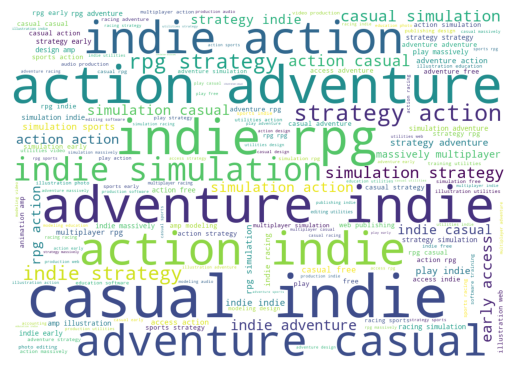

In [29]:
np = WordCloud(width=1000, height=700,  background_color='white').generate(texto)
plt.imshow(np)
plt.axis('off')

ANALIZO DATAFRAME "ITEMS"

In [ ]:
df_items

,user_id,items_count,steam_id,item_id,playtime_forever
0,76561197970982479,277,76561197970982479,10.0,6.0
1,76561197970982479,277,76561197970982479,20.0,0.0
2,76561197970982479,277,76561197970982479,30.0,7.0
3,76561197970982479,277,76561197970982479,40.0,0.0
4,76561197970982479,277,76561197970982479,50.0,0.0
...,...,...,...,...,...
5170010,76561198329548331,7,76561198329548331,373330.0,0.0
5170011,76561198329548331,7,76561198329548331,388490.0,3.0
5170012,76561198329548331,7,76561198329548331,521570.0,4.0
5170013,76561198329548331,7,76561198329548331,519140.0,3.0


In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170015 entries, 0 to 5170014
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          int64  
 3   item_id           float64
 4   playtime_forever  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 197.2+ MB


In [ ]:
df_items.describe()

,items_count,steam_id,item_id,playtime_forever
count,5.170015e+06,5.170015e+06,5.153209e+06,5.153209e+06
mean,3.136999e+02,7.656120e+16,1.784481e+05,9.914951e+02
std,6.924635e+02,3.918316e+07,1.318598e+05,5.418204e+03
min,0.000000e+00,7.656120e+16,1.000000e+01,0.000000e+00
25%,7.100000e+01,7.656120e+16,3.446000e+04,0.000000e+00
50%,1.370000e+02,7.656120e+16,2.144200e+05,3.400000e+01
75%,2.750000e+02,7.656120e+16,2.664300e+05,3.550000e+02
max,7.762000e+03,7.656120e+16,5.307200e+05,6.427730e+05


Total de valores nulos: 33612
Total de valores: 25850075
Porcentaje de valores nulos: 0.13%


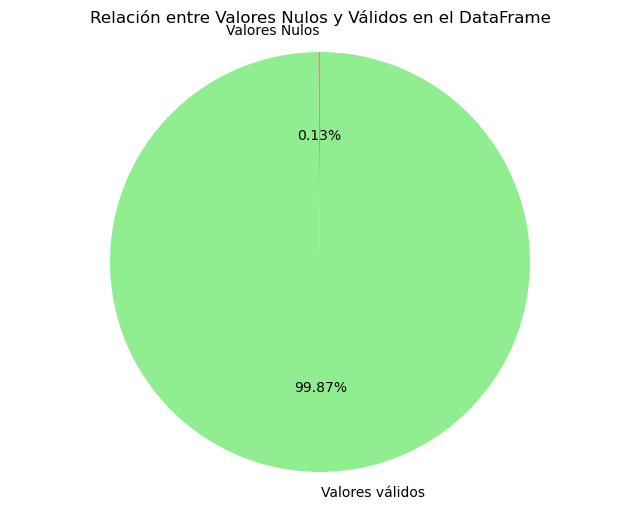

In [ ]:
# Número total de valores nulos en el DataFrame
total_nulos = df_items.isnull().sum().sum()

# Número total de valores en el DataFrame
total_valores = df_items.size

# Porcentaje de valores nulos
porcentaje_nulos = (total_nulos / total_valores) * 100

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de valores: {total_valores}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

# Creo una lista de valores para el gráfico de torta
valores = [total_nulos, total_valores - total_nulos]
etiquetas = ['Valores Nulos', 'Valores válidos']

# Creo el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.2f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Relación entre Valores Nulos y Válidos en el DataFrame')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



BUSCO Y ANALIZO OUTLIERS.

In [33]:
df_items['playtime_forever'] = df_items['playtime_forever'].astype(int)

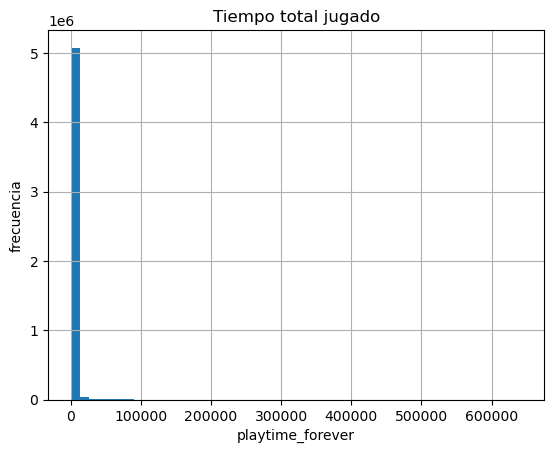

In [34]:
df_items['playtime_forever'].hist(bins=50)
plt.title('Tiempo total jugado')
plt.xlabel('playtime_forever')
plt.ylabel('frecuencia')
plt.show()

In [35]:
frecuencia_de_valores = df_items['playtime_forever'].value_counts()
frecuencia_de_valores

playtime_forever
0         1867963
1          102730
2           34770
3           31905
4           29438
           ...   
44704           1
22268           1
42856           1
217085          1
34753           1
Name: count, Length: 48861, dtype: int64

In [36]:
df_items[df_items['playtime_forever'] >= 180480]

,user_id,items_count,steam_id,item_id,playtime_forever
4645,thequeenpanda,524,76561198010803705,4000,255613
5169,death-hunter,121,76561198018556265,4000,243840
6832,wirlom,50,76561198096285145,550,184933
9010,76561198078738103,33,76561198078738103,4000,303466
17400,76561197990792016,113,76561197990792016,730,189556
...,...,...,...,...,...
4992383,76561198088238670,123,76561198088238670,4000,193520
5015880,76561198090486706,44,76561198090486706,226320,231136
5108704,76561198111731944,5,76561198111731944,243870,278011
5132565,talibanstorm,16,76561198137551215,730,201190


Con esto podemos confirmar que todos los valores mostrados en la lista anterior son outliers, debido a que la plataforma steam se abrió el 12 de septiembre de 2003 y de esa fecha a la fecha de hoy han transcurrido 180,480 horas, debido a eso, todos los registros que superen esa cantida son un error.

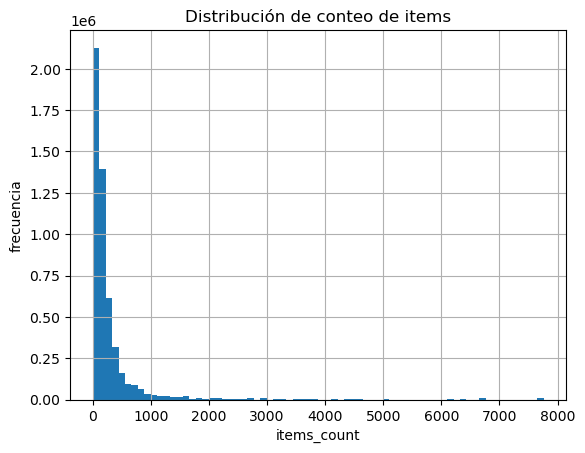

In [37]:
df_items['items_count'].hist(bins=70)
plt.title('Distribución de conteo de items')
plt.xlabel('items_count')
plt.ylabel('frecuencia')
plt.show()

###  ANALIZO DATAFRAME 'REVIEWS'.

In [39]:
df_reviews

,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250.0,True,2
1,76561197970982479,22200.0,True,2
2,76561197970982479,43110.0,True,2
3,js41637,251610.0,True,2
4,js41637,227300.0,True,2
...,...,...,...,...
59328,76561198312638244,70.0,True,2
59329,76561198312638244,362890.0,True,2
59330,LydiaMorley,273110.0,True,2
59331,LydiaMorley,730.0,True,1


In [40]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             59333 non-null  object 
 1   item_id             59305 non-null  float64
 2   recommend           59305 non-null  object 
 3   sentiment_analysis  59333 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


#### ANALIZO Y BUSCO NULOS.

Total de valores nulos: 56
Total de valores: 237332
Porcentaje de valores nulos: 0.02%


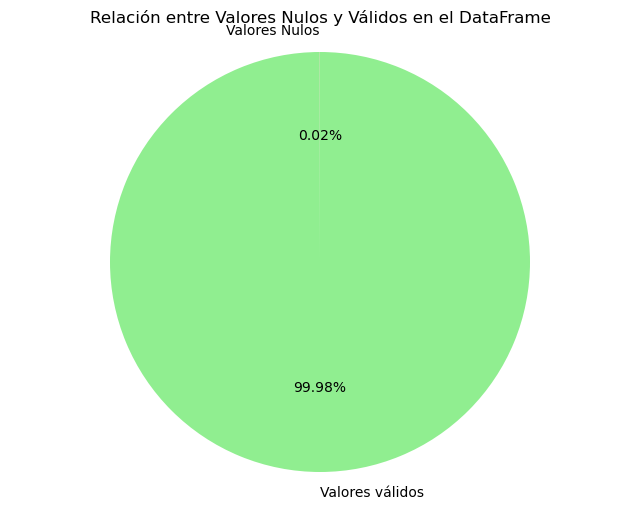

In [42]:
# Número total de valores nulos en el DataFrame
total_nulos = df_reviews.isnull().sum().sum()

# Número total de valores en el DataFrame
total_valores = df_reviews.size

# Porcentaje de valores nulos
porcentaje_nulos = (total_nulos / total_valores) * 100

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de valores: {total_valores}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

# Crear una lista de valores para el gráfico de torta
valores = [total_nulos, total_valores - total_nulos]
etiquetas = ['Valores Nulos', 'Valores válidos']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.2f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Relación entre Valores Nulos y Válidos en el DataFrame')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Con este conteo de items podemos inferir que una muy pequeña cantidad de jugadores pasan de los 1000 items, pudiendo considerar a estos como outliers, la mayoria de los jugadores cuentan con pocos items.

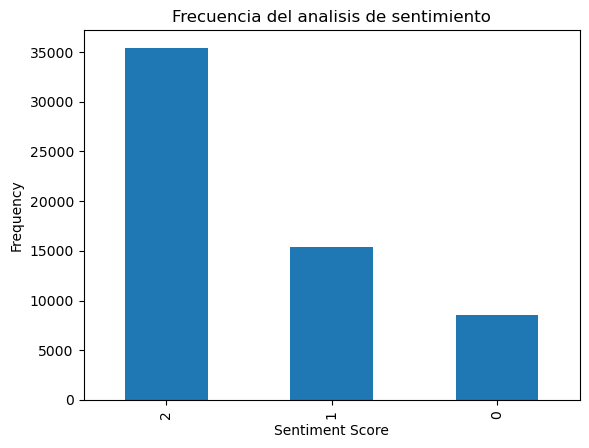

In [38]:
df_reviews['sentiment_analysis'].value_counts().plot(kind='bar')
plt.title('Frecuencia del analisis de sentimiento')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()